In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import kurtosis, skew, pearsonr, variation, iqr, somersd

In [172]:
df = pd.read_excel('dataset.xlsx', nrows=279)
df["SESSO"].replace({'M': 0., 'F': 1.}, inplace=True)
df["TARGET"].replace({2.0: 1.}, inplace=True)
for key in df.keys():
    df[key] = pd.to_numeric(df[key].astype(str).str.replace(",", ""), errors='coerce')

correlations = np.array(df.corrwith(df['TARGET'], method="kendall"))[:-1]
print(f"Correlations with TARGET:\n", df.corrwith(df['TARGET'], method="kendall"))
beta = 0.2
chosen_corrs = correlations > beta
X = df.drop(columns='TARGET').to_numpy(dtype=np.float64)
# X = df[['Eosinofili', 'AST', 'LDH', 'PCR', 'Monociti', 'Linfociti']].to_numpy(dtype=np.float64)
# X = X[:, chosen_corrs]
y = df['TARGET'].to_numpy(dtype=np.float64)

Correlations with TARGET:
 SESSO        -0.249735
AGE           0.056435
WBC          -0.178520
Piastrine    -0.092355
Neutrofili   -0.100715
Linfociti    -0.213555
Monociti     -0.185434
Eosinofili   -0.215767
Basofili     -0.171577
PCR           0.238826
AST           0.410829
ALT           0.224363
ALP          -0.074779
GGT           0.165086
LDH           0.363080
TARGET        1.000000
dtype: float64


In [173]:
imp = IterativeImputer(max_iter=300, random_state=0)
imp.fit(X)
X = np.round(imp.transform(X), 1)

In [174]:
# from sklearn.preprocessing import normalize
# X = np.round(normalize(X, axis=0, norm='max'), 2)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=104, test_size=0.2)

In [176]:
class FuzzySet:
    pass

0


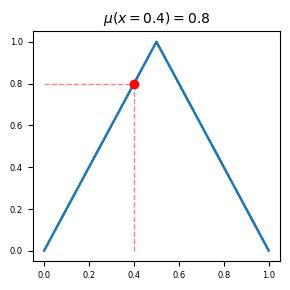

In [177]:
class Triangle(FuzzySet):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def get_membership_value(self, x):
        if(self.a <= x and x < self.b): y = ((x-self.a)/(self.b-self.a))
        elif(self.b <= x and x <= self.c): y = ((self.c-x)/(self.c-self.b))
        else: y = 0
        return np.round(y, 2)

    def plot(self, ret = False, fig_x = 3, fig_y = 3):
        x = np.linspace(self.a, self.c, num=2000)
        y = [self.get_membership_value(x_i) for x_i in x]

        fig, ax = plt.subplots(figsize=(fig_x, fig_y), tight_layout=True)
        ax.plot(x, y)
        ax.tick_params(axis='both', which='major', labelsize=6)
        ax.tick_params(axis='both', which='minor', labelsize=5)
        # fig.suptitle('Triangle type-1 fuzzy number', fontsize=10)
        if(not ret): plt.show()
        else: return fig, ax

    def plot_x(self, x):
        fig, ax = self.plot(ret=True)
        y = self.get_membership_value(x)
        ax.plot(x, y, c="r", marker="o")
        ax.plot((x, x), (0, y), color='r', linestyle='dashed', linewidth=1, alpha=0.5)
        ax.plot((0, x), (y, y), color='r', linestyle='dashed', linewidth=1, alpha=0.5)
        ax.set_title(r'$\mu(x=$'+str(x)+r'$) = $'+str(y), fontsize=10)
        plt.tight_layout()

tri = Triangle(0, 0.5, 1)
print(tri.get_membership_value(1.5))
tri.plot_x(0.4)

In [196]:
class LeftTrapezoid(FuzzySet):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def get_membership_value(self, x):
        if(self.a <= x and x < self.b): y = 1
        elif(self.b <= x and x <= self.c): y = ((self.c-x)/(self.c-self.b))
        else: y = 0
        return np.round(y, 2)
    
class RightTrapezoid(FuzzySet):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def get_membership_value(self, x):
        if(self.a <= x and x < self.b): y = ((x-self.a)/(self.b-self.a))
        elif(self.b <= x and x <= self.c): y = 1
        else: y = 0
        return np.round(y, 2)

In [193]:
from string import ascii_uppercase as alc

class FuzzySets:
    sets = {}
    def __init__(self):
        self.sets = {}

    def add(self, fs, name):
        self.sets[name] = fs
        
    def plot(self, ret = False, fig_x = 3, fig_y = 3):
        fig, ax = plt.subplots(figsize=(fig_x, fig_y), tight_layout=True)
        for key, fs in self.sets.items():
            x = np.linspace(fs.a, fs.c, num=2000)
            y = [fs.get_membership_value(x_i) for x_i in x]
            ax.plot(x, y, label=key)
        ax.tick_params(axis='both', which='major', labelsize=6)
        ax.tick_params(axis='both', which='minor', labelsize=5)
        ax.legend()
        # fig.suptitle('Triangle type-1 fuzzy number', fontsize=10)
        if(not ret): plt.show()
        else: return fig, ax

    def plot_x(self, x):
        fig, ax = self.plot(ret=True)
        y = self.get_membership_value(x)
        ax.plot(x, y, c="r", marker="o")
        ax.plot((x, x), (0, y), color='r', linestyle='dashed', linewidth=1, alpha=0.5)
        ax.plot((0, x), (y, y), color='r', linestyle='dashed', linewidth=1, alpha=0.5)
        ax.set_title(r'$\mu(x=$'+str(x)+r'$) = $'+str(y), fontsize=10)
        plt.tight_layout()

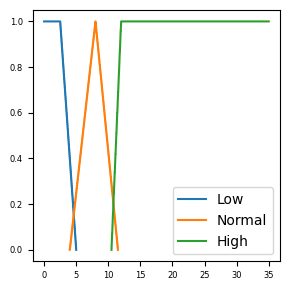

In [201]:
WBC_max = max(X_train[:, 2])

fs_1 = LeftTrapezoid(0, 2.5, 5)
fs_2 = Triangle(4, 8, 11.5)
fs_3 = RightTrapezoid(10.5, 12, 35)

setss = FuzzySets()
setss.add(fs_1, "Low")
setss.add(fs_2, "Normal")
setss.add(fs_3, "High")
setss.plot()

In [199]:
WBC_max = max(X_train[:, 2])
WBC_min = min(X_train[:, 2])
WBC_avg = np.mean(X_train[:, 2])

# tri = Triangle(WBC_min, WBC_avg, WBC_max)
# print(tri.get_membership_value(1.5))
# tri.plot_x(X_test[2, 2])

In [ ]:
class Rule:
    

In [ ]:
class FuzzyController:
    rules = []
    
    def __init__(self):
        self.rules = []
        